<a href="https://colab.research.google.com/github/xxxcrttt/Kaggle/blob/main/Titanic/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Titanic - Machine Learning from Disaster

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import drive
import os
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the data 
titanic = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# count of the number of each column 
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# sex
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# Look at survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
# Look at survival rate by sex and class
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


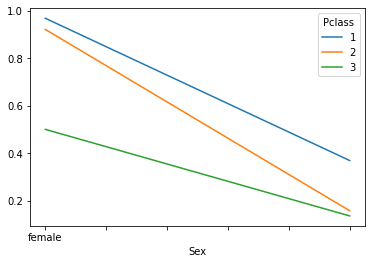

In [9]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass').plot()

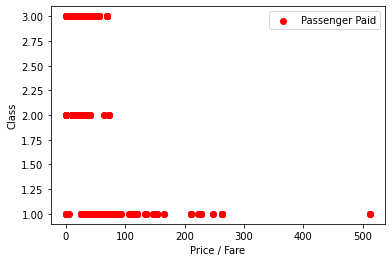

In [10]:
# plot the prices paid of each class
plt.scatter(titanic['Fare'], titanic['Pclass'],color='r',label='Passenger Paid')
plt.xlabel('Price / Fare')
plt.ylabel('Class')
plt.legend()
plt.show()

In [11]:
# replace sex to 0 or 1
titanic.loc[titanic['Sex'] =="male", "Sex"] = 0
titanic.loc[titanic['Sex'] =="female", "Sex"] = 1

In [12]:
# replace embarked 
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic['Embarked'] =="S", "Embarked"] = 0
titanic.loc[titanic['Embarked'] =="C", "Embarked"] = 1
titanic.loc[titanic['Embarked'] =="Q", "Embarked"] = 2

In [23]:
# Count the empty values in each column
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
# Look at all the values in each column 
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

0    577
1    314
Name: Sex, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

0    646
1    168
2     77
Name: Embarked, dtype: int64



In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [29]:
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
label  = LabelEncoder()

# Encode the sex column & embarked
label.fit_transform(titanic.iloc[:, 2].values)
label.fit_transform(titanic.iloc[:, 5].values)
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[0 1]
[0 1 2]


In [35]:
# Machine Learning Process

# split the data in to X and Y, Y = survival 
X = titanic.iloc[:, 1:7].values
Y = titanic.iloc[:, 0].values

# training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# scale the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
# create a function with machine learning model 
def models(X_train, Y_train):

  # Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  # K-Nearest Neighbours
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
  knn.fit(X_train, Y_train)

  # SVM(linear Kernel)
  from sklearn.svm import SVC
  svc_line = SVC(kernel='linear', random_state=0)
  svc_line.fit(X_train, Y_train)

  # SVM(RBF Kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(X_train, Y_train)


  # Gaissian Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  nb = GaussianNB()
  nb.fit(X_train, Y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, Y_train)

  # Random Forest 
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, Y_train)

  # print the training accuracy for each model
  print('[1]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[2]KNN Training Accuracy: ', knn.score(X_train, Y_train))
  print('[3]SVC-linear Training Accuracy: ', svc_line.score(X_train, Y_train))
  print('[4]SVC-RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[5]Naive Bayes Training Accuracy: ', nb.score(X_train, Y_train))
  print('[6]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
  print('[7]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))

  return log, svc_line, svc_rbf, nb, tree, forest

In [51]:
# Get and train all the models 
model = models(X_train, Y_train)

[1]Logistic Regression Training Accuracy:  0.7991573033707865
[2]KNN Training Accuracy:  0.8398876404494382
[3]SVC-linear Training Accuracy:  0.7865168539325843
[4]SVC-RBF Training Accuracy:  0.8202247191011236
[5]Naive Bayes Training Accuracy:  0.7879213483146067
[6]Decision Tree Training Accuracy:  0.9241573033707865
[7]Random Forest Training Accuracy:  0.9143258426966292


In [53]:
# confusion matrix and accuracy on test data 
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  # Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP + TN) / (TN + FP + FN + TP)

  print(cm)
  print('Model[{}] Testing Accuracy = {} '.format(i, test_score))


[[95 15]
 [21 48]]
Model[0] Testing Accuracy = 0.7988826815642458 
[[92 18]
 [20 49]]
Model[1] Testing Accuracy = 0.7877094972067039 
[[98 12]
 [22 47]]
Model[2] Testing Accuracy = 0.8100558659217877 
[[91 19]
 [18 51]]
Model[3] Testing Accuracy = 0.7932960893854749 
[[96 14]
 [20 49]]
Model[4] Testing Accuracy = 0.8100558659217877 
[[98 12]
 [20 49]]
Model[5] Testing Accuracy = 0.8212290502793296 


In [56]:
# Get feature importance 
forest = model[5]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:7].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
Fare,0.434
Sex,0.285
Pclass,0.094
Parch,0.076
SibSp,0.060
Embarked,0.051


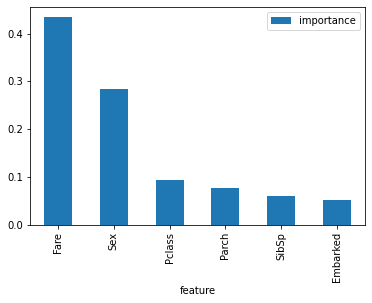

In [59]:
# visualize the importance
importances.plot.bar()

In [60]:
my_survival = [[2, 1, 21, 0, 123, 1]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

pred = model[5].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print("No you die!")
else:
  print("Yesy you survived!")

[0]
No you die!
